# K-Means

**K-Means**: Finds the best k points that form the centers of each of the k clusters. These points are called *centroids*. The algorithm begins by choosing k observations at random and making these observations the initial centroids. Then it iterates over the following two steps:
* Assign each data point to its nearest centroid.
* Create new centroids by taking the mean of all of the data points assigned to each centroid.
k-means tries to minimize its loss function. The loss function of the k-means algorithm is called the inertia, and the k-means algorithm tries to find the means (centroids) that minimize the inertia. The algorithm stops when the difference between the old and the new centroids is lower than a given threshold value. When the inertia begins to decrease linearly (the point where an "elbow" is formed), this is the optimal number of clusters.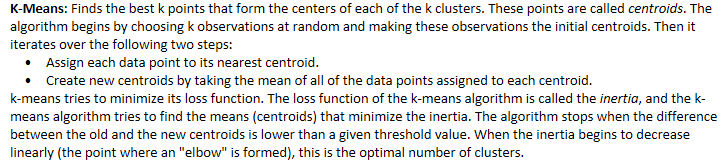

The below code randomly sample two normally distributed datasets with different means and then cluster them using k-means

In [15]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn import datasets



## Random Data

First we will run the k-means on a random dataset.

In [ ]:
cluster_1x = np.random.normal(10,5,500)
cluster_1y = np.random.normal(20,5,500)
cluster_1 = np.concatenate([cluster_1x.reshape(-1,1),cluster_1y.reshape(-1,1)], axis=1)

cluster_2x = np.random.normal(30,5,500)
cluster_2y = np.random.normal(20,5,500)
cluster_2 = np.concatenate([cluster_2x.reshape(-1,1),cluster_2y.reshape(-1,1)], axis=1)

all_data = np.concatenate([cluster_1,cluster_2],axis=0)

scaler = StandardScaler()
all_data = scaler.fit_transform(all_data)

First, run "normal" k-means.

57.8 ms ± 234 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


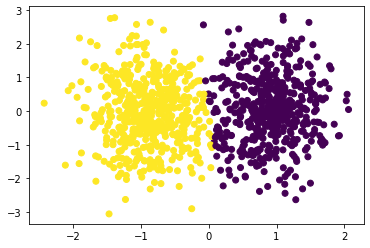

In [11]:
k_means = KMeans(n_clusters=2, random_state=123)
%timeit k_means.fit(all_data)
y_pred = k_means.predict(all_data)

# Plot the solution.
plt.scatter(all_data[:,0], all_data[:,1], c=y_pred)
plt.show()

Now, run mini-batch to comare times

13.2 ms ± 163 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


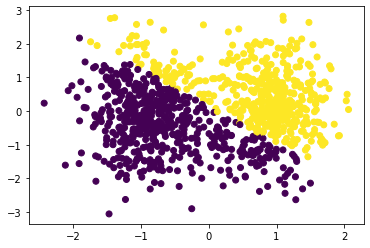

In [13]:
mini_batch_k_means = MiniBatchKMeans(n_clusters=2, random_state=123)
%timeit mini_batch_k_means.fit(all_data)
y_pred_mini = mini_batch_k_means.predict(all_data)

# Plot the solution.
plt.scatter(all_data[:,0], all_data[:,1], c=y_pred_mini)
plt.show()

## Iris

Now we will run k-mean on actual data - the infamous `iris` dataset.

In [16]:
# Loading the data from Sklearn's datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

First, we run k-means by setting `n_clusters=3`

In [17]:
# Defining the k-means
kmeans_cluster = KMeans(n_clusters=3, random_state=123)

# Fit model
%timeit kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)

21.9 ms ± 1.72 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


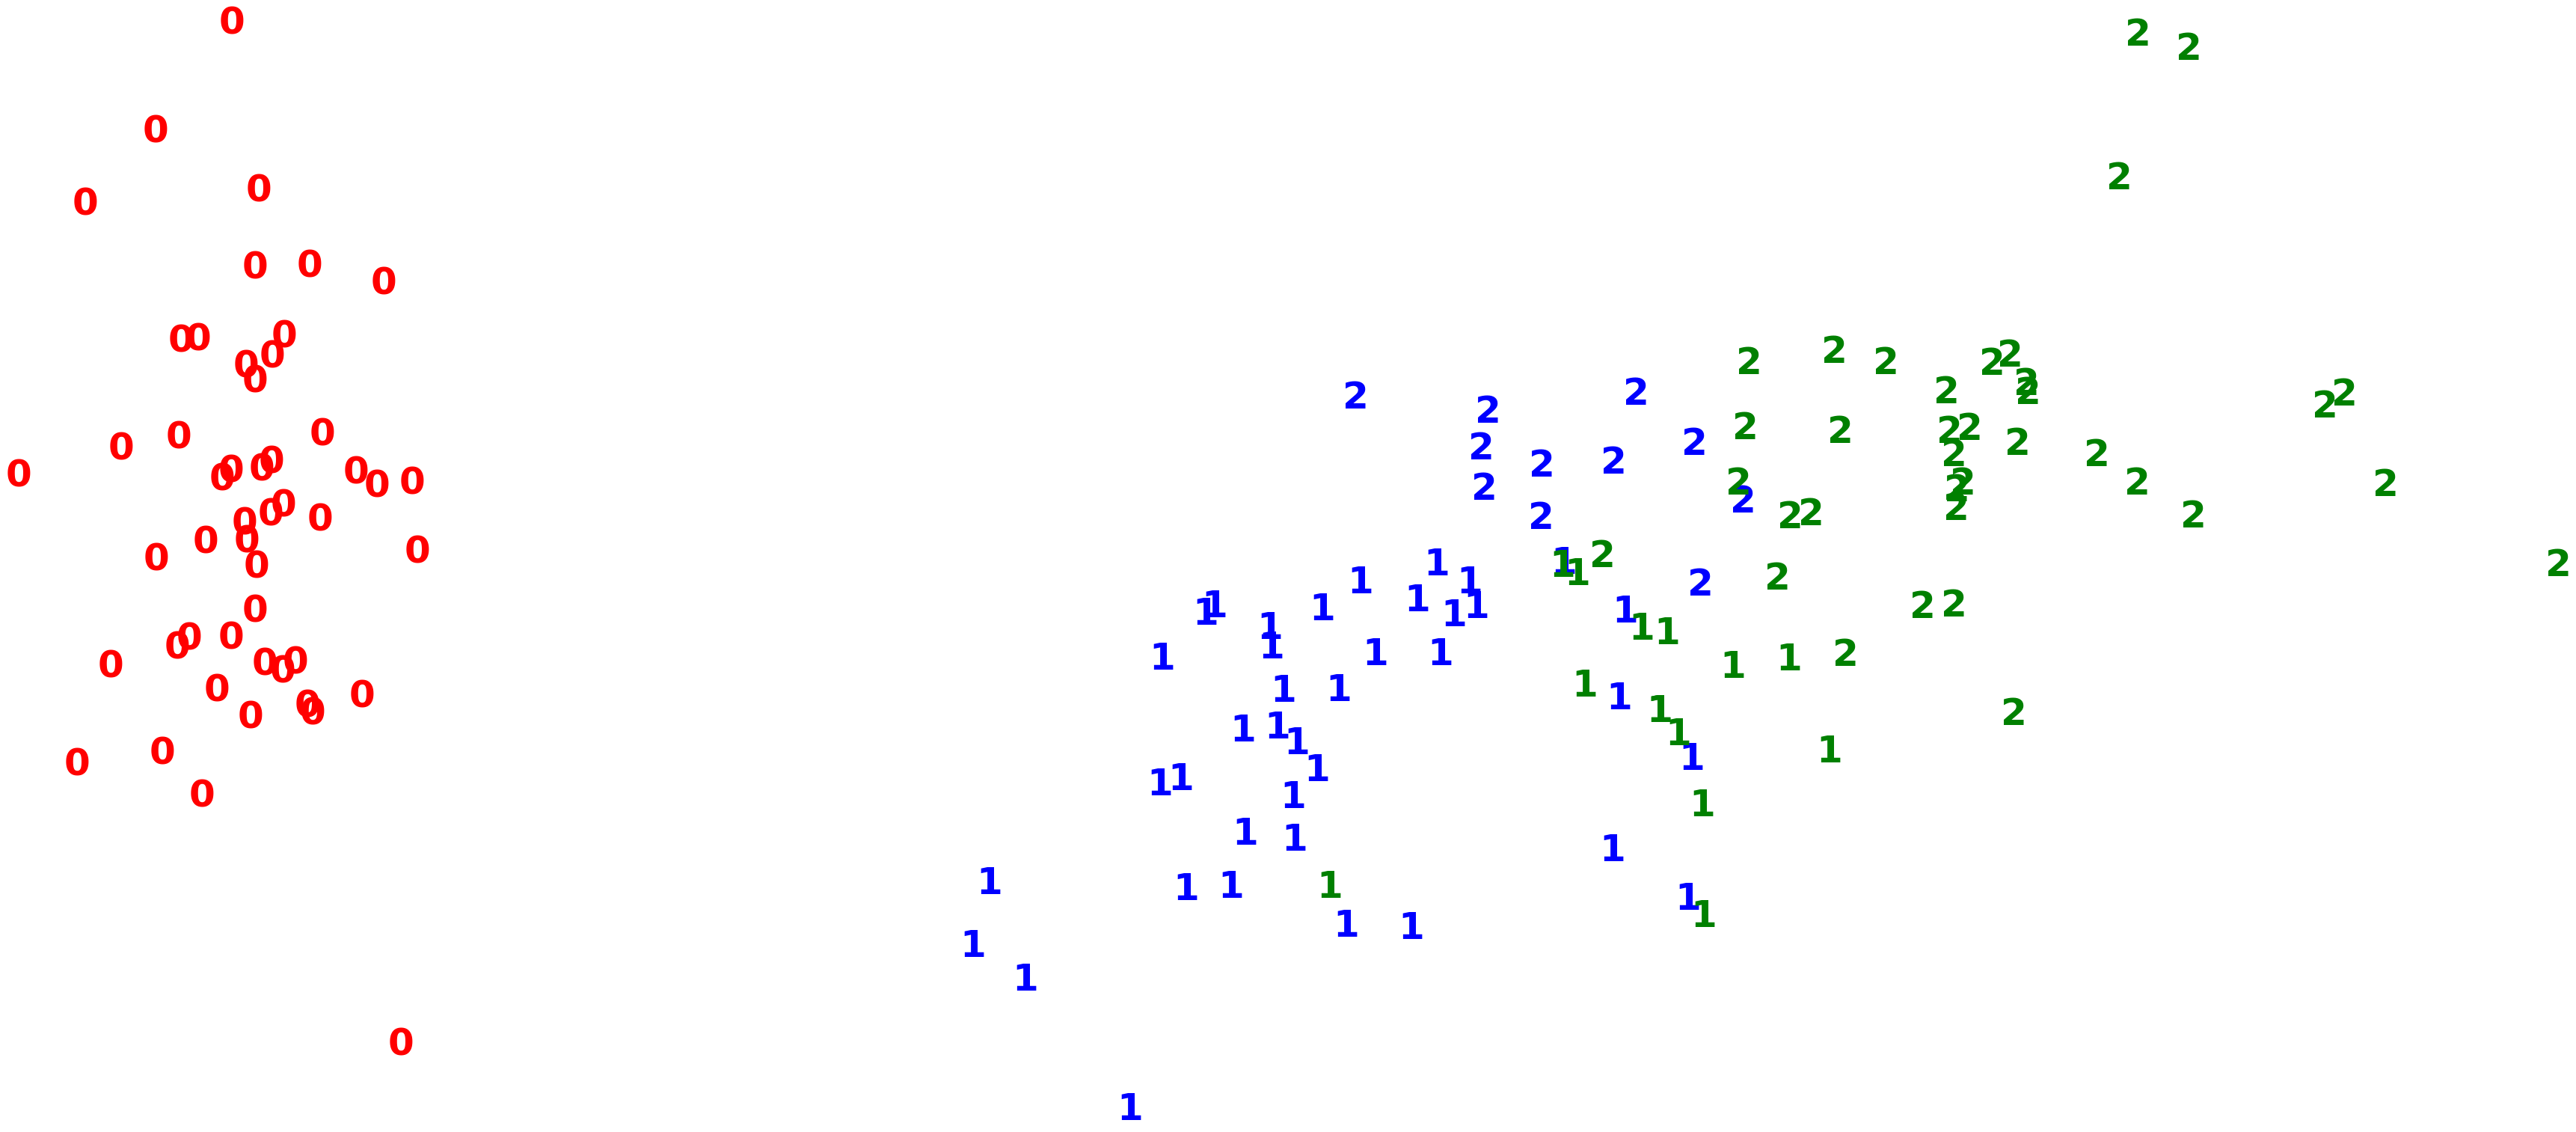

In [18]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Next, we will use `mini-batch` k-means

10.1 ms ± 937 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


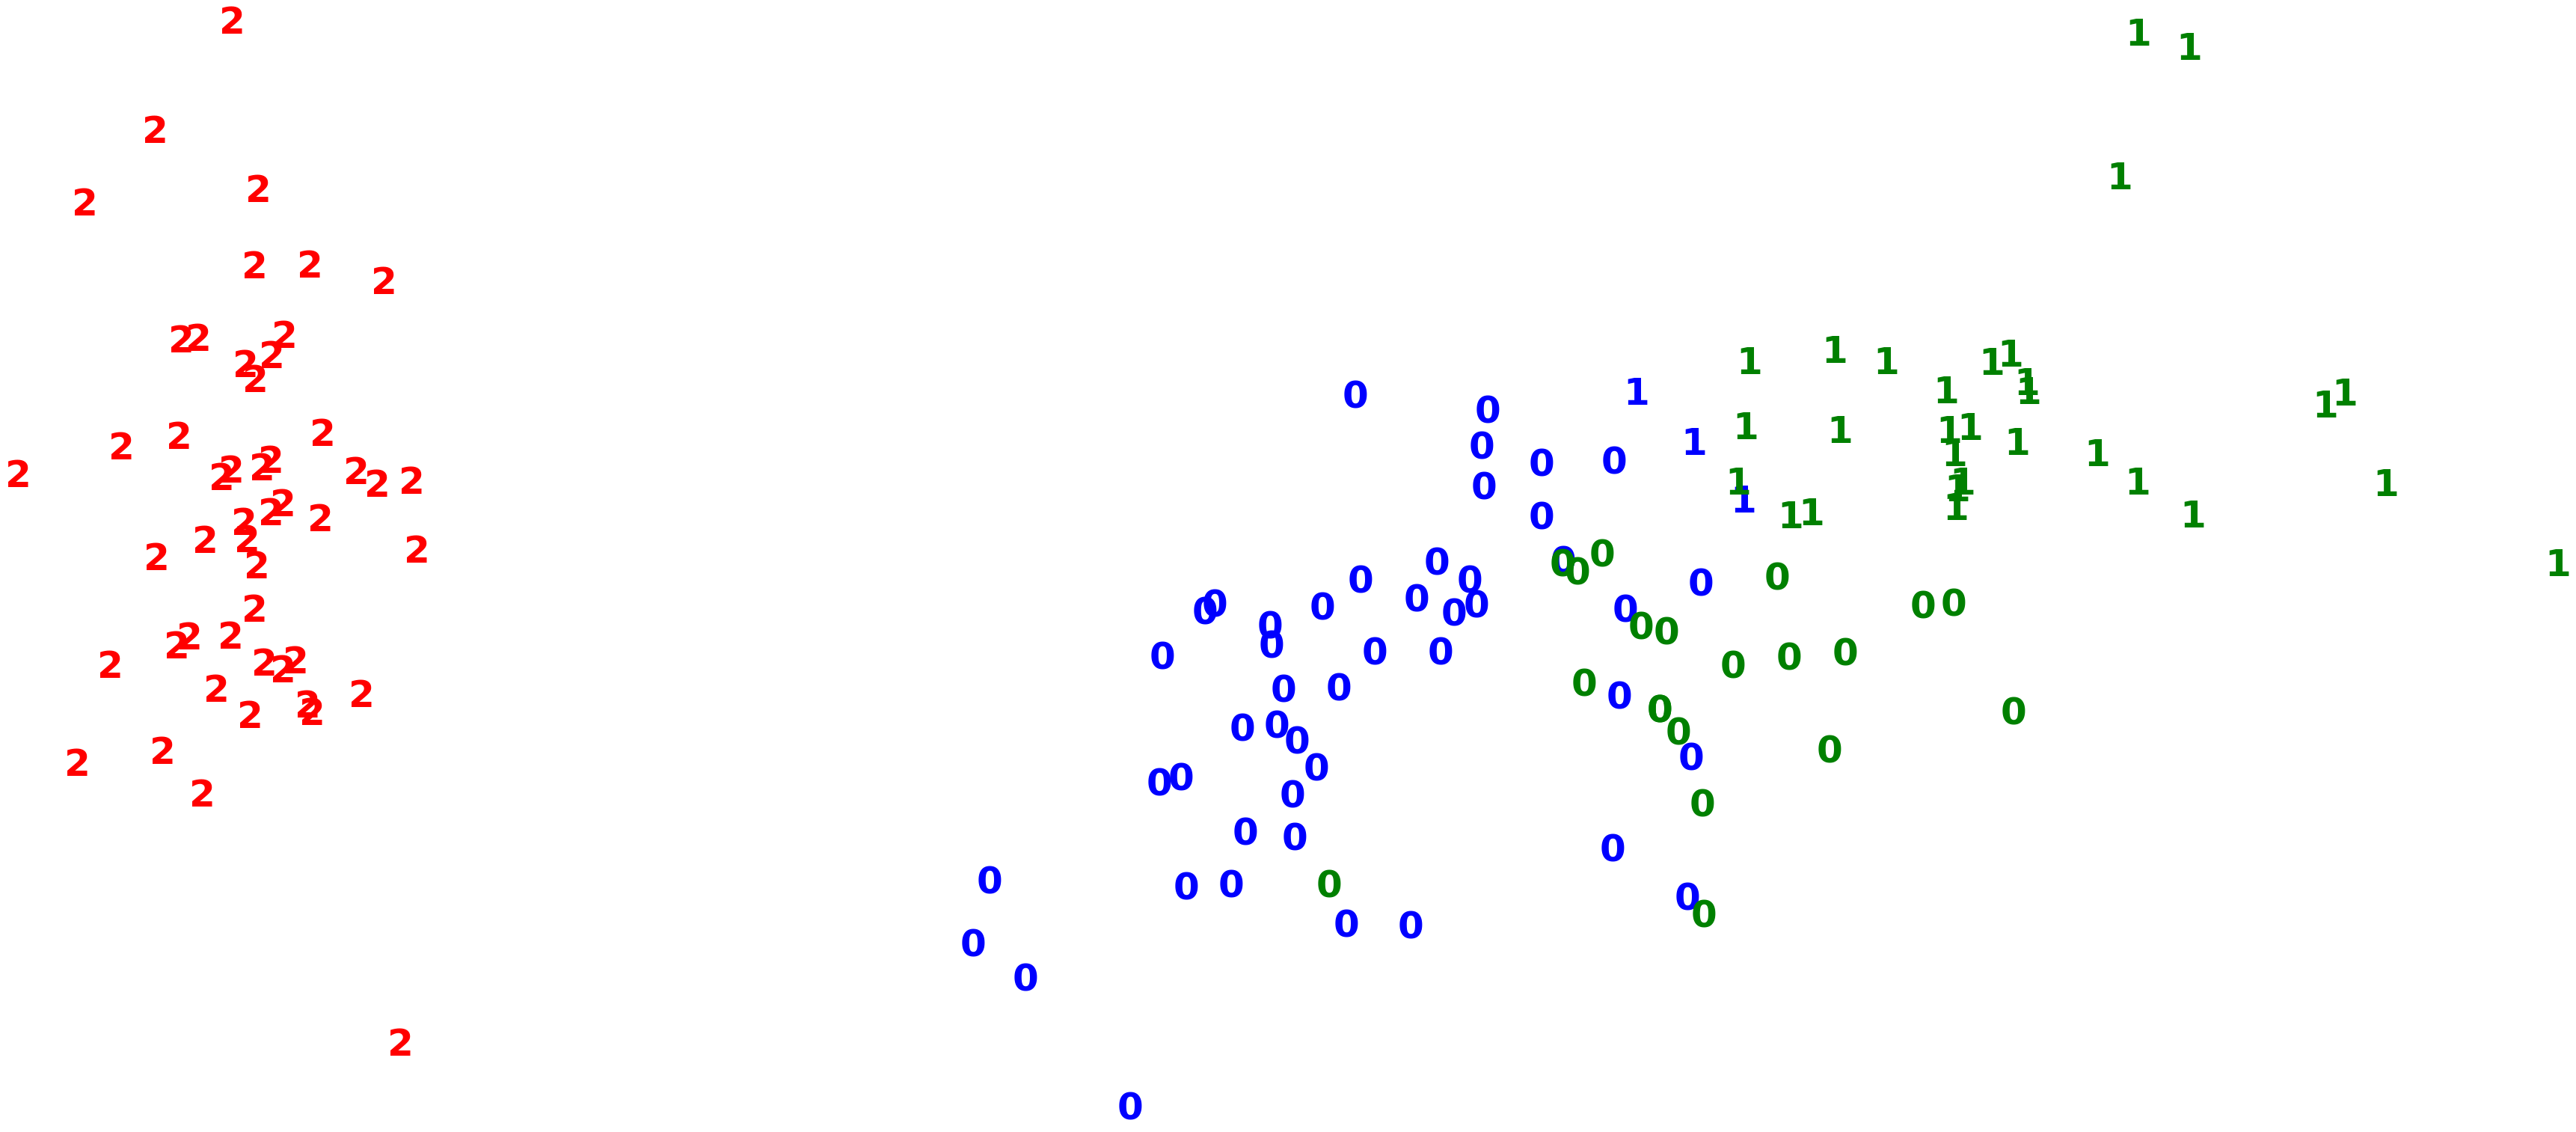

In [19]:
# Defining the mini-batch k-means
minikmeans_cluster = MiniBatchKMeans(
    init='random',
    n_clusters=3,
    batch_size=50)

# Fit model
%timeit minikmeans_cluster.fit(X_std)
minikmeans_cluster = minikmeans_cluster.predict(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(minikmeans_cluster[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()